In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace

df = pd.read_csv('google_drive_nanreplaced.csv')

In [2]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


In [3]:
data= df[['time','owned_google_forms_delta']]

In [7]:
data.head()

,time,owned_google_forms_delta
0,2017-03-12 05:00:00,0.0
1,2017-03-14 04:00:00,0.0
2,2017-03-16 04:00:00,0.0
3,2017-03-19 04:00:00,0.0
4,2017-03-20 04:00:00,0.0


In [8]:
data.describe()

,owned_google_forms_delta
count,831.000000
mean,20.211140
std,21.223384
min,-93.000000
25%,7.000000
50%,17.000000
75%,28.000000
max,248.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002571567B278>]],
      dtype=object)

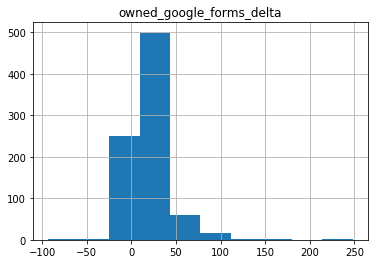

In [9]:
data.hist()

In [10]:
data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Year')

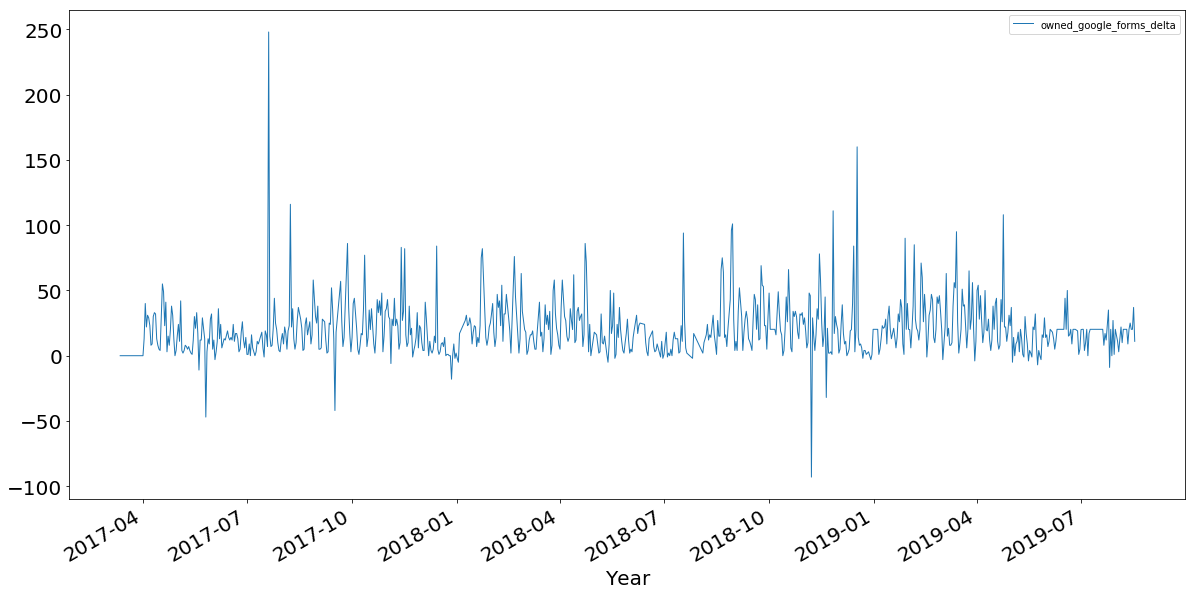

In [11]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

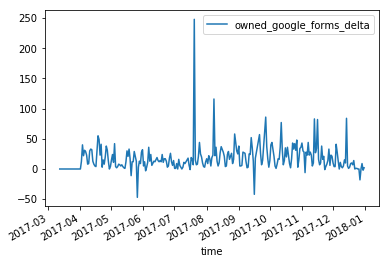

In [12]:
data.loc['2017'].plot()

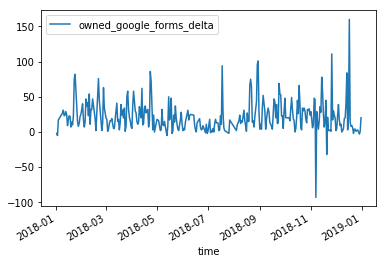

In [13]:
data.loc['2018'].plot()

In [15]:
alpha = norm.fit(data['owned_google_forms_delta'])[0]
beta = norm.fit(data['owned_google_forms_delta'])[1]

In [16]:
oiu = data['owned_google_forms_delta']

In [18]:
density = kde.gaussian_kde(oiu, bw_method=None)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


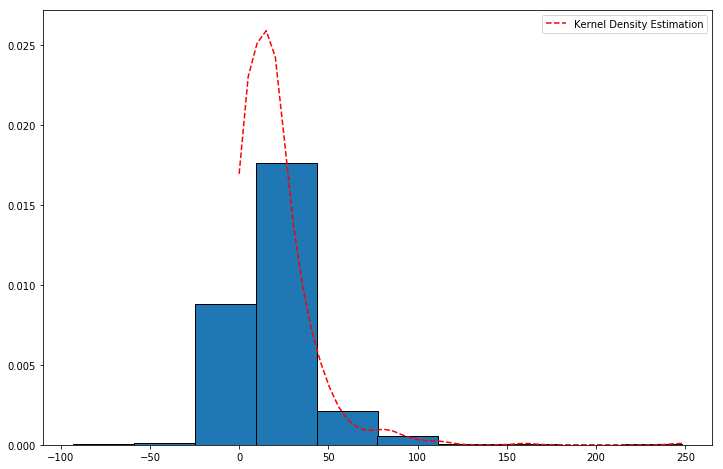

In [19]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'r--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [20]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [21]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.06380506652662152, pvalue=0.00219866387079537)

In [23]:
data1= df['owned_google_forms_delta']
users_sample= np.random.choice(a= data1,size= 300)
print(users_sample.mean())

21.774075993091536


In [24]:
data1.mean()-users_sample.mean()

-1.5629360967184738

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002571647AE48>]],
      dtype=object)

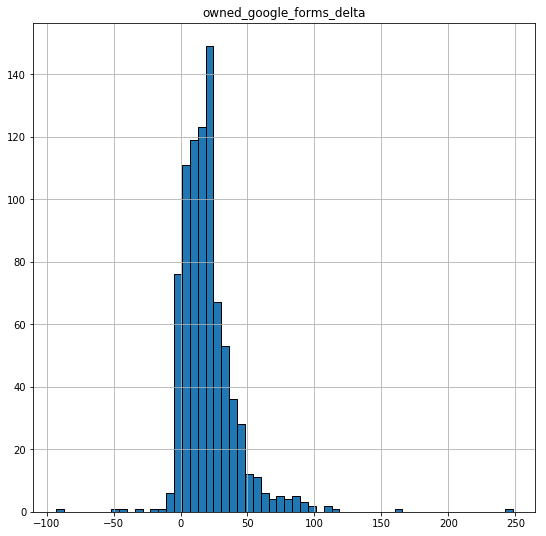

In [25]:
pd.DataFrame(data1).hist(bins=58,figsize=(9,9), ec='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025716331BE0>]],
      dtype=object)

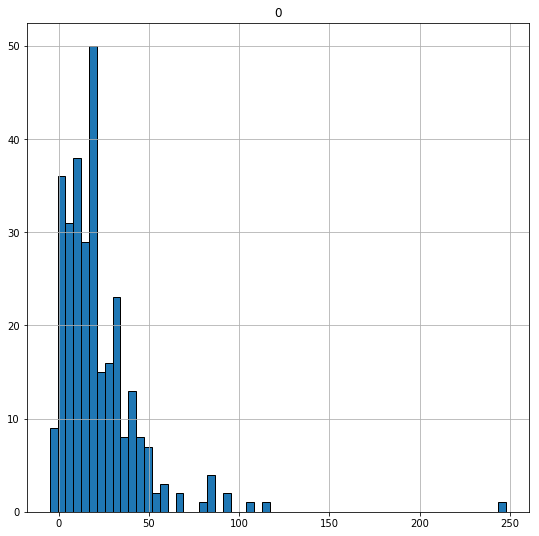

In [26]:
pd.DataFrame(users_sample).hist(bins=58,figsize=(9,9), ec='black')

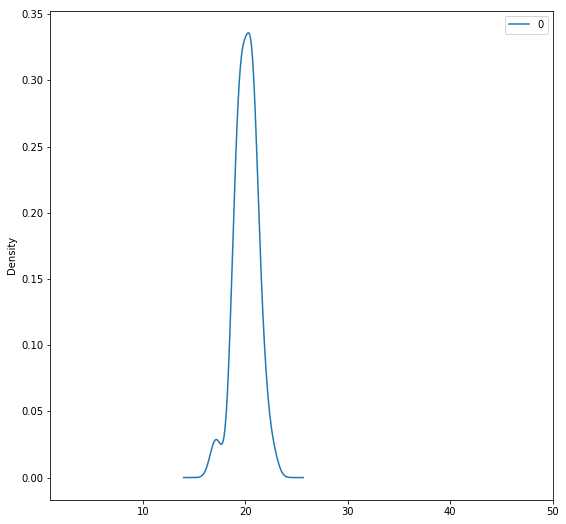

In [27]:
point_estimates = []         # Make empty list to hold point estimates
data1=df['owned_google_forms_delta']
for x in range(50):         # Generate 200 samples
    sample = np.random.choice(a= data1, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(1,50)) 

In [28]:
data1.mean()- np.array(point_estimates).mean()

0.10470146804836133

In [31]:
np.random.seed(10)
import math
import scipy.stats as stats
sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
18.180928324697756
Confidence interval:
(15.779320466399149, 20.582536182996364)


In [32]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data1, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

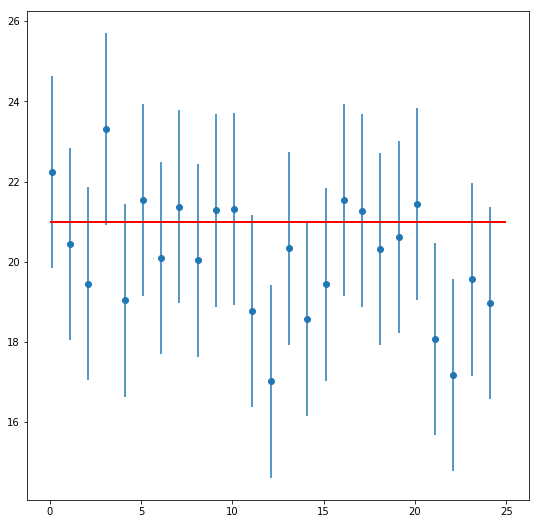

In [36]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=21, 
           linewidth=2.0,
           color="red")

In [37]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=299)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9679296690653618
Confidence interval:
(15.952737037440903, 20.409119611954612)


In [38]:
# Check the difference between critical values with a sample size of 200
             
stats.t.ppf(q=0.975, df= 199) - stats.norm.ppf(0.975)  

0.011992559709340878

In [39]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 199,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(15.948177602039841, 20.41367904735567)

In [40]:
data1=df['owned_google_forms_delta']
data2=df['owned_google_documents_delta']
np.cov(data1, data2)[0,1]

7832.967924027719

In [41]:
print('Covariance of X and Y: %.2f'%np.cov(data1, data2)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(data1, data2)[0, 1])

Covariance of X and Y: 7832.97
Correlation of X and Y: 0.53


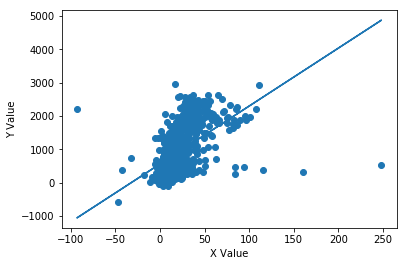

Correlation of X and Y: 0.53


In [42]:
X = data1
Y = data2

m, b = np.polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.plot(X, m*X + b, '-')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

In [43]:
datasample_forms_delta= np.random.choice(a= data1, size = 300)

In [45]:
datasample_documents_delta= np.random.choice(a= data2, size = 300)

In [46]:
print(data1.mean())
print(datasample_forms_delta.mean())

20.211139896373062
20.682150259067356


In [48]:
print(data2.mean())
print(datasample_documents_delta.mean())

914.5375647668384
843.4240457685665


In [49]:
stats.ttest_1samp(a = data1, popmean = data2.mean())

Ttest_1sampResult(statistic=-1214.73611265887, pvalue=0.0)

In [50]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=299)  # Degrees of freedom

-1.9679296690653623

In [51]:
stats.t.cdf(x= -1214.73611265887,#T-test statistic
            df= 299)*2

0.0

In [52]:
sigma = data1.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 80,                     # Degrees of freedom
                 loc = data1.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(14.238084436103438, 26.184195356642686)

In [53]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 299,                     # Degrees of freedom
                 loc = data1.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(12.430291872209885, 27.99198792053624)

In [54]:
datasample1= np.random.choice(a= data1, size = 300)
datasample2= np.random.choice(a= data2, size= 300)
print(datasample1.mean())
print(datasample2.mean())

21.253039723661487
913.0932556131261


In [55]:
stats.ttest_ind(a= datasample1,
                b= data2,
                equal_var=False) 

Ttest_indResult(statistic=-36.94602968946595, pvalue=6.67682946396235e-178)

In [56]:
stats.ttest_rel(a= datasample1,
               b= datasample2)

Ttest_relResult(statistic=-21.625368353919402, pvalue=4.316935338147434e-63)